#Develope a Multiple Linear Regression Model to predict students marks

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import files          #Upload Students2.csv from the "Feature Selection" folder of the course 
uploaded = files.upload()

Saving Students2.csv to Students2.csv


In [ ]:
marks = pd.read_csv('Students2.csv')
marks.head()

,Hours,sHours,hoursplayed,income,distance,calories,Marks
0,0,6,6,146,9,2491,34
1,1,7,2,112,5,2303,36
2,1,6,1,84,7,2475,33
3,1,8,5,134,0,2282,39
4,1,8,5,104,8,2359,42


In [ ]:
#Specify X (independant variables) and Y(predicted variable or target variable)
X = marks.iloc[:, 0:-1]
Y = marks.iloc[:, -1]

In [ ]:
#Train and Test split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1234)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
mark_regressor = LinearRegression()                  #Select the regressor (Model) to be LinearRegression
mark_regressor.fit(X_train, Y_train)                 #Now train your model on X_train set to predict the Y_train set

LinearRegression()

In [ ]:
Y_predicted = mark_regressor.predict(X_test)         #Predict the values of Y_test set by regressing against X_test set

In [ ]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(Y_test, Y_predicted)
MSE

48.751210615983545

In [ ]:
mark_regressor.score(X_test,Y_test)   # R-Square

0.8427485982415691

#F-Score& P-Value Features Selection Method
Uaing f-regression, you can find P-values of variables, fr(X,Y) , and select variables with low P-values only

In [ ]:
from sklearn.feature_selection import f_regression as fr

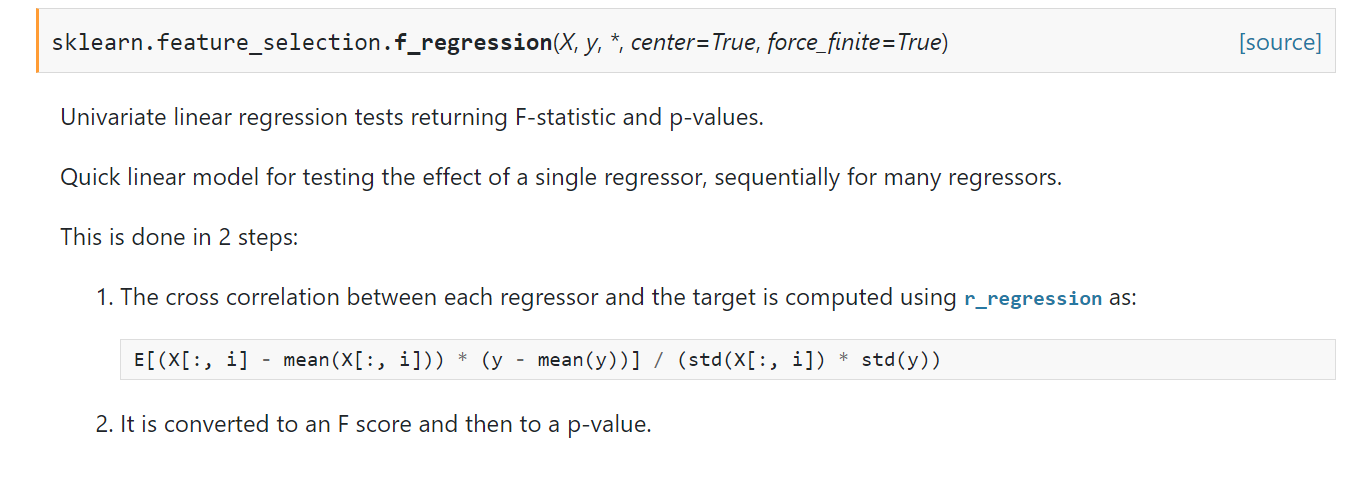

In [ ]:
result = fr(X, Y)
result

(array([1.41905913e+02, 4.57019756e+00, 1.44882087e-03, 1.59990513e-01,
        3.16606568e-03, 4.04208927e-01]),
 array([1.77038466e-12, 4.14028344e-02, 9.69907241e-01, 6.92200477e-01,
        9.55528076e-01, 5.30086171e-01]))

In [ ]:
F_Score = result[0]
P_Value = result[1]

print('P-Values are:',P_Value,'\n')
print('F-Scores are:',F_Score)

P-Values are: [1.77038466e-12 4.14028344e-02 9.69907241e-01 6.92200477e-01
 9.55528076e-01 5.30086171e-01] 

F-Scores are: [1.41905913e+02 4.57019756e+00 1.44882087e-03 1.59990513e-01
 3.16606568e-03 4.04208927e-01]


In [ ]:
columns = list(X.columns)

i=int(-1)
for c in columns:
 i+=1
 print(c,':', P_Value[i],',', F_Score[i]) 
 #Based on P-Values shown below, we pick "Hours" and "sHours" since for them P-Value<0.05 and drop the other features

Hours : 1.7703846633368096e-12 , 141.90591265093306
sHours : 0.04140283437892134 , 4.570197562174471
hoursplayed : 0.9699072414603728 , 0.001448820873055793
income : 0.6922004770304084 , 0.15999051253393012
distance : 0.9555280755289408 , 0.0031660656839195517
calories : 0.5300861708497477 , 0.40420892706591777


In [ ]:
#if you look at the correlation of featrues with the target variable, you will find them consistent with the P-values obtained above.
#After all, that's how the f-regression works  --->  It calcuates the cross correlation between each of the features and target variable and then converts to P-values

correlation = marks.corr()
correlation.style.background_gradient(cmap='coolwarm')

,Hours,sHours,hoursplayed,income,distance,calories,Marks
Hours,1.000000,0.133596,0.047286,-0.109228,0.082932,-0.045989,0.913894
sHours,0.133596,1.000000,0.123567,0.182407,-0.212104,-0.228707,0.374591
hoursplayed,0.047286,0.123567,1.000000,0.028436,-0.055723,0.114584,0.007193
income,-0.109228,0.182407,0.028436,1.000000,0.247844,-0.328160,0.075376
distance,0.082932,-0.212104,-0.055723,0.247844,1.000000,-0.230818,-0.010633
calories,-0.045989,-0.228707,0.114584,-0.328160,-0.230818,1.000000,-0.119292
Marks,0.913894,0.374591,0.007193,0.075376,-0.010633,-0.119292,1.000000


In [ ]:
import statsmodels.api as sm

X2 = sm.add_constant(X) # adding a constant (intercept)
model = sm.OLS(Y, X2)
my_regressor = model.fit()
print(my_regressor.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                  Marks   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     48.89
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           5.95e-12
Time:                        04:45:59   Log-Likelihood:                -89.006
No. Observations:                  30   AIC:                             192.0
Df Residuals:                      23   BIC:                             201.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -5.3061     15.763     -0.337      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Drop features with high P-values and run the model again**

In [ ]:
#Specify X (independant variables) and Y(predicted variable or target variable)
X_train_FS = X_train [['Hours', 'sHours']]
X_test_FS = X_test [['Hours', 'sHours']]

In [ ]:
mark_regressor = LinearRegression()                  #Select the regressor (Model) to be LinearRegression
mark_regressor.fit(X_train_FS, Y_train)                 #Now train your model on X_train set to predict the Y_train set
Y_predicted_FS = mark_regressor.predict(X_test_FS)         #Predict the values of Y_test set by regressing against X_test set

In [ ]:
from sklearn.metrics import mean_squared_error

MSE_FS = mean_squared_error(Y_test, Y_predicted_FS)
MSE_FS
#The MSE_FS is smaller than MSE because the new model has only the featrues with low P-Values

25.981624010552082

In [ ]:
mark_regressor.score(X_test_FS,Y_test)   # R-Square

0.9161939417709495

#"SelectKBest" Features Selection Method
SelectKBest automats the f-regression method discussed above and picks the variables with lowest P-values

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

Selecor_KBest = SelectKBest(score_func = f_regression, k=3) #This selector would use f_regressor to pick top 3 features
x_KBest = Selecor_KBest.fit_transform(X,Y)
x_KBest

array([[   0,    6, 2491],
       [   1,    7, 2303],
       [   1,    6, 2475],
       [   1,    8, 2282],
       [   1,    8, 2359],
       [   2,    8, 2354],
       [   2,    6, 2943],
       [   3,    6, 2119],
       [   3,    7, 2511],
       [   3,    7, 2666],
       [   3,    8, 2934],
       [   4,    8, 2838],
       [   4,    7, 2102],
       [   4,    7, 2560],
       [   5,    8, 2068],
       [   5,    6, 2541],
       [   6,    6, 2690],
       [   6,    7, 2956],
       [   7,    8, 2239],
       [   7,    8, 2703],
       [   7,    6, 2603],
       [   7,    6, 2031],
       [   8,    7, 2885],
       [   8,    8, 2153],
       [   9,    8, 2384],
       [   9,    5, 2882],
       [   9,    8, 2271],
       [  10,    8, 2264],
       [  10,    8, 2522],
       [  11,    7, 2279]])

In [ ]:
Selecor_KBest.get_support(indices=True)

array([0, 1, 5])

In [ ]:
columns = Selecor_KBest.get_support(indices=True) #This gives the index number of selected features
#Selected_columns = X.columns[columns]
Selected_columns = X.columns[columns].tolist()
Selected_columns

['Hours', 'sHours', 'calories']

In [ ]:
#Let's see the F-Score and P-Values of the features to verify they are the same as previous part
F_Score = Selecor_KBest.scores_
P_Value = Selecor_KBest.pvalues_


columns = list(X.columns)

i=int(-1)
for c in columns:
 i+=1
 print(c,':', P_Value[i],',', F_Score[i]) 
 #Based on P-Values shown below, we pick "Hours" and "sHours" since for them P-Value<0.05 and drop the other features

Hours : 1.7703846633368096e-12 , 141.90591265093306
sHours : 0.04140283437892134 , 4.570197562174471
hoursplayed : 0.9699072414603728 , 0.001448820873055793
income : 0.6922004770304084 , 0.15999051253393012
distance : 0.9555280755289408 , 0.0031660656839195517
calories : 0.5300861708497477 , 0.40420892706591777


#"SelectPercentile" Features Selection Method

In [ ]:
from sklearn.feature_selection import  SelectPercentile, f_regression 

Selecor_Percentile = SelectPercentile(score_func = f_regression, percentile=50) #This selector would use f_regressor to pick top 50 Percentile of the features
x_Percentile = Selecor_Percentile.fit_transform(X,Y)
#x_Percentile

In [ ]:
columns = Selecor_Percentile.get_support(indices=True) #This gives the index number of selected features
#Selected_columns = X.columns[columns]
Selected_columns = X.columns[columns].tolist()
Selected_columns

['Hours', 'sHours', 'calories']

In [ ]:
#Let's see the F-Score and P-Values of the features to verify they are the same as previous part
F_Score = Selecor_Percentile.scores_
P_Value = Selecor_Percentile.pvalues_


columns = list(X.columns)

i=int(-1)
for c in columns:
 i+=1
 print(c,':', P_Value[i],',', F_Score[i]) 
 #Based on P-Values shown below, we pick "Hours" and "sHours" since for them P-Value<0.05 and drop the other features

Hours : 1.7703846633368096e-12 , 141.90591265093306
sHours : 0.04140283437892134 , 4.570197562174471
hoursplayed : 0.9699072414603728 , 0.001448820873055793
income : 0.6922004770304084 , 0.15999051253393012
distance : 0.9555280755289408 , 0.0031660656839195517
calories : 0.5300861708497477 , 0.40420892706591777


#"Generic Univariate Select" Features Selection Method

This method is the most commonly used

In [ ]:
from sklearn.feature_selection import  GenericUnivariateSelect, f_regression  


Selecor_G1 = GenericUnivariateSelect(score_func = f_regression, 
                                     mode = 'k_best',            # mode ='percentile' :we can have different modes based on which the selector selects features
                                     param = 3 )                 #This selector would use f_regressor to pick top 3 features

x_G1 = Selecor_G1.fit_transform(X,Y)
#x_G1


In [ ]:
columns = Selecor_G1.get_support(indices=True) #This gives the index number of selected features
#Selected_columns = X.columns[columns]
Selected_columns = X.columns[columns].tolist()
Selected_columns

['Hours', 'sHours', 'calories']

In [ ]:
#Let's see the F-Score and P-Values of the features to verify they are the same as previous part
F_Score = Selecor_G1.scores_
P_Value = Selecor_G1.pvalues_


columns = list(X.columns)

i=int(-1)
for c in columns:
 i+=1
 print(c,':', P_Value[i],',', F_Score[i]) 
 #Based on P-Values shown below, we pick "Hours" and "sHours" since for them P-Value<0.05 and drop the other features

Hours : 1.7703846633368096e-12 , 141.90591265093306
sHours : 0.04140283437892134 , 4.570197562174471
hoursplayed : 0.9699072414603728 , 0.001448820873055793
income : 0.6922004770304084 , 0.15999051253393012
distance : 0.9555280755289408 , 0.0031660656839195517
calories : 0.5300861708497477 , 0.40420892706591777


#You Won't have to manually modify the X_test dataset to include only the selected features.

#Using RFE method in the next session will do it automatically for you!!